Objective: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

Dataset: This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?
Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?


In [5]:

df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [6]:
df.shape

(2443651, 9)

In [7]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [8]:
#categorical: asin, title, isbestseller, category, uid?
#numerical: stars, reviews, price, boughtinlastmonth 

In [9]:
categorical = df.select_dtypes(exclude="number")

In [10]:
numerical = df.select_dtypes(include="number")

In [11]:
categorical.head()

,asin,title,isBestSeller,category
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",False,Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",True,Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",False,Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",False,Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,False,Hi-Fi Speakers


In [12]:
numerical.head()

,uid,stars,reviews,price,boughtInLastMonth
0,1,4.7,15308,21.99,0
1,2,4.7,98099,23.99,0
2,3,4.7,15308,21.99,0
3,4,4.7,7205,31.99,0
4,5,4.6,1881,17.99,0


In [13]:
numerical["boughtInLastMonth"].value_counts() #categorical?

boughtInLastMonth
0        2230204
50         75790
100        58578
200        24200
300        13650
400         8836
1000        8692
500         6110
600         4320
700         3121
2000        2550
800         2456
900         2070
3000        1130
4000         634
5000         430
10000        259
6000         223
7000         150
8000         116
9000          97
20000         27
50000          3
30000          3
40000          2
Name: count, dtype: int64

In [14]:
numerical["stars"].nunique() #categorical? 

42

In [15]:
frequency_table = categorical["category"].value_counts().reset_index().head(5).sort_values(by= "count", ascending = False)
frequency_table

,category,count
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978


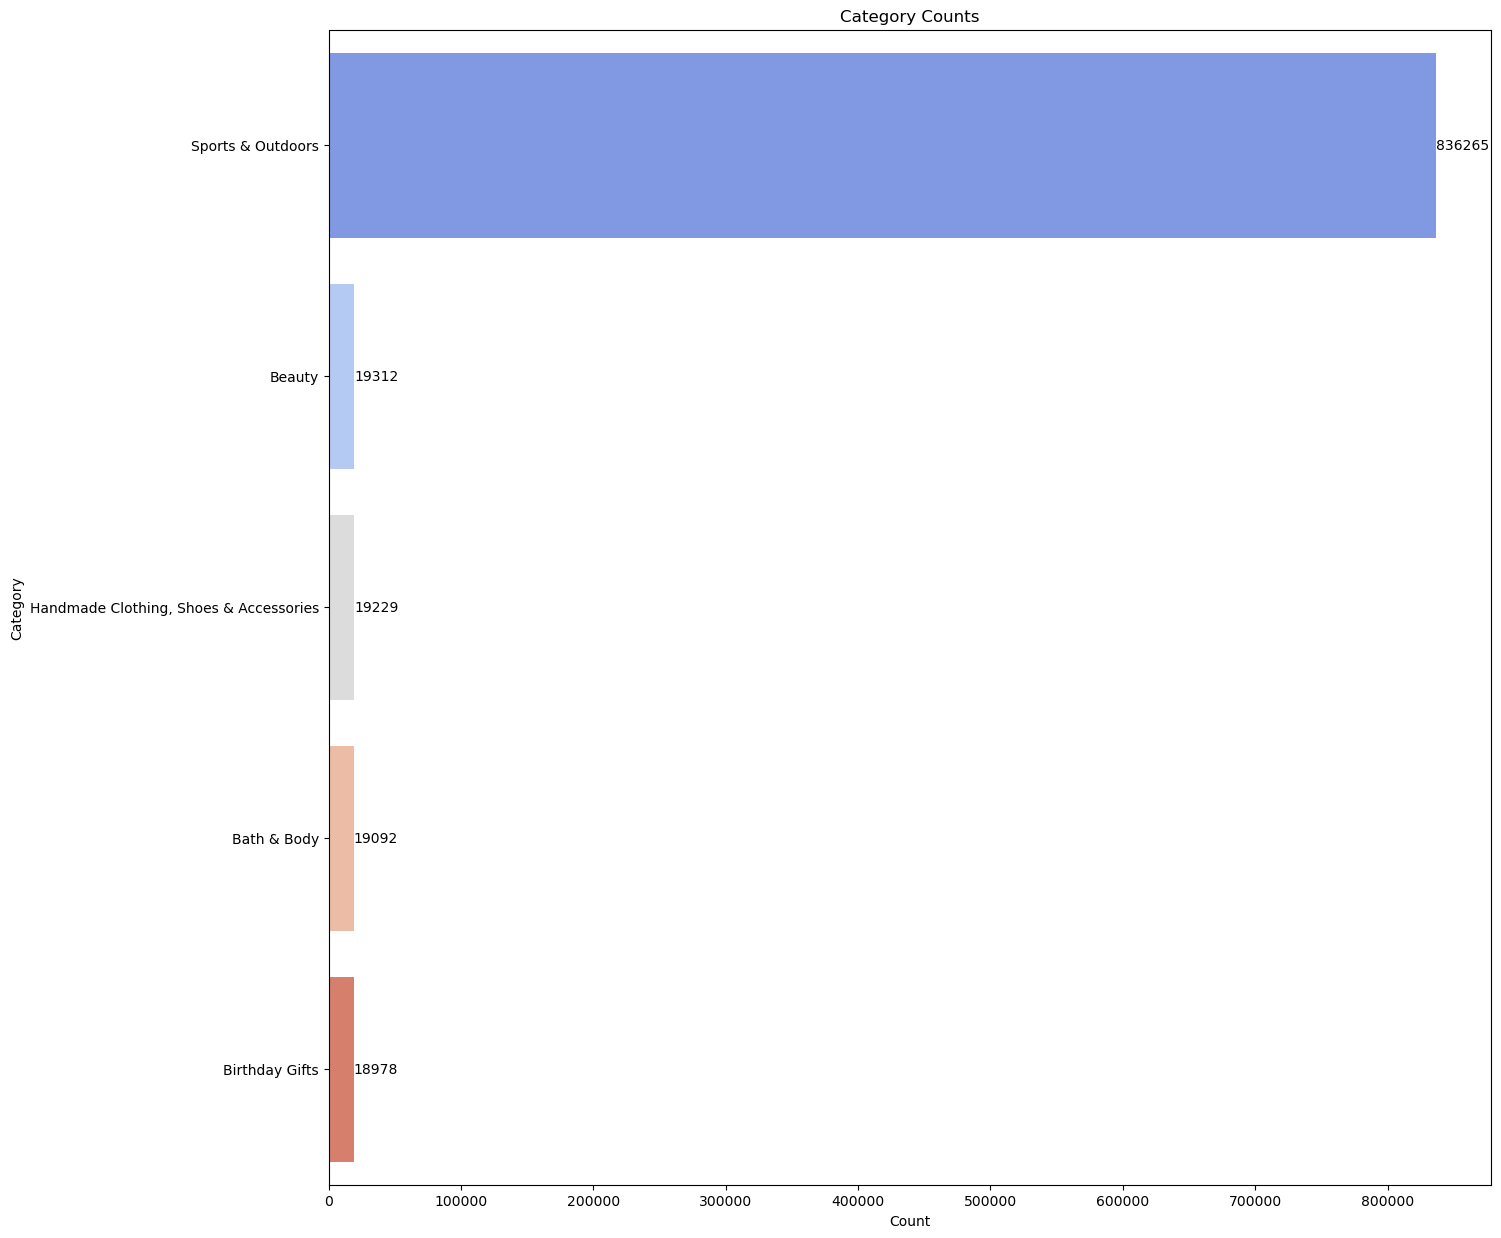

In [16]:
#Bar chart for top 5 categories

plt.figure(figsize=(15, 15))
ax = sns.barplot(data=frequency_table, x="count", y="category", palette="coolwarm")
ax.set_title("Category Counts")
ax.set_xlabel("Count")
ax.set_ylabel("Category")
ax.bar_label(ax.containers[0], fmt='%d')
plt.show()

In [17]:
#One element is bigger than the other ones, so it's complicated to visualize the real size between the other categories. Let's look these other 4 categories closer.
frequency_2= categorical["category"].value_counts().reset_index()[1:5].sort_values(by= "count", ascending = False)
frequency_2

,category,count
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978


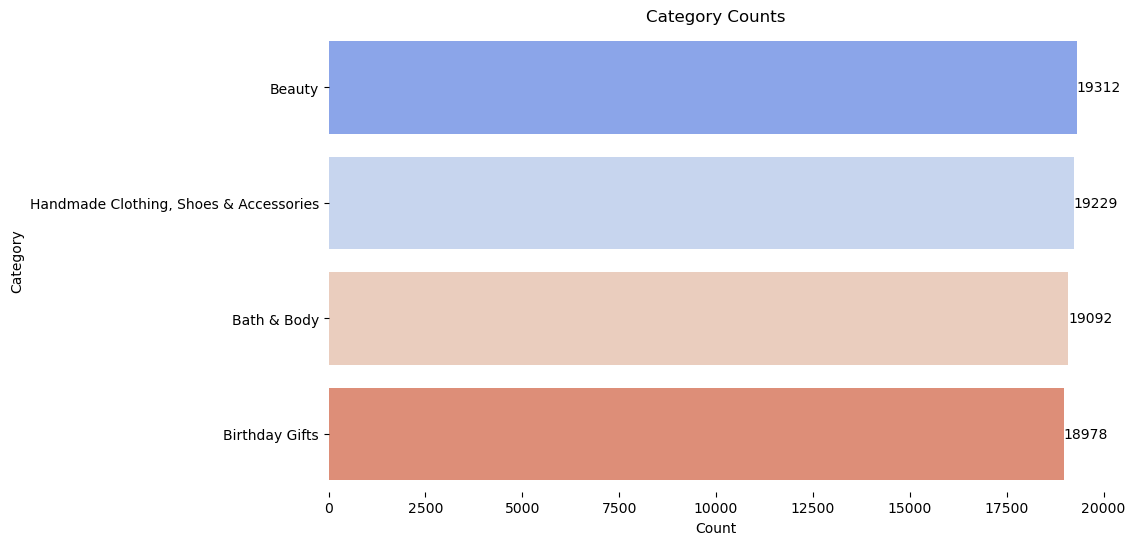

In [18]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=frequency_2, x="count", y="category", palette="coolwarm")
ax.set_title("Category Counts")
ax.set_xlabel("Count")
ax.set_ylabel("Category")
ax.set_xlim(0, 20000)
ax.bar_label(ax.containers[0], fmt='%d')
sns.despine(left=True, bottom=True)
plt.show()

([<matplotlib.patches.Wedge at 0x14363db50>,
 [Text(1.0619894641325325, -0.2866677136886832, 'Sports & Outdoors'),
  Text(-0.9852466974708034, 0.48917169288796264, 'Beauty'),
  Text(-1.0412846831644895, 0.35457891731887975, 'Handmade Clothing, Shoes & Accessories'),
  Text(-1.0788687885174038, 0.2145743161773788, 'Bath & Body'),
  Text(-1.0976547688734235, 0.07179142267312526, 'Birthday Gifts')],
 [Text(0.5792669804359267, -0.15636420746655447, '91.6%'),
  Text(-0.5374072895295291, 0.2668209233934341, '2.1%'),
  Text(-0.5679734635442669, 0.1934066821739344, '2.1%'),
  Text(-0.5884738846458565, 0.11704053609675205, '2.1%'),
  Text(-0.5987207830218674, 0.03915895782170468, '2.1%')])

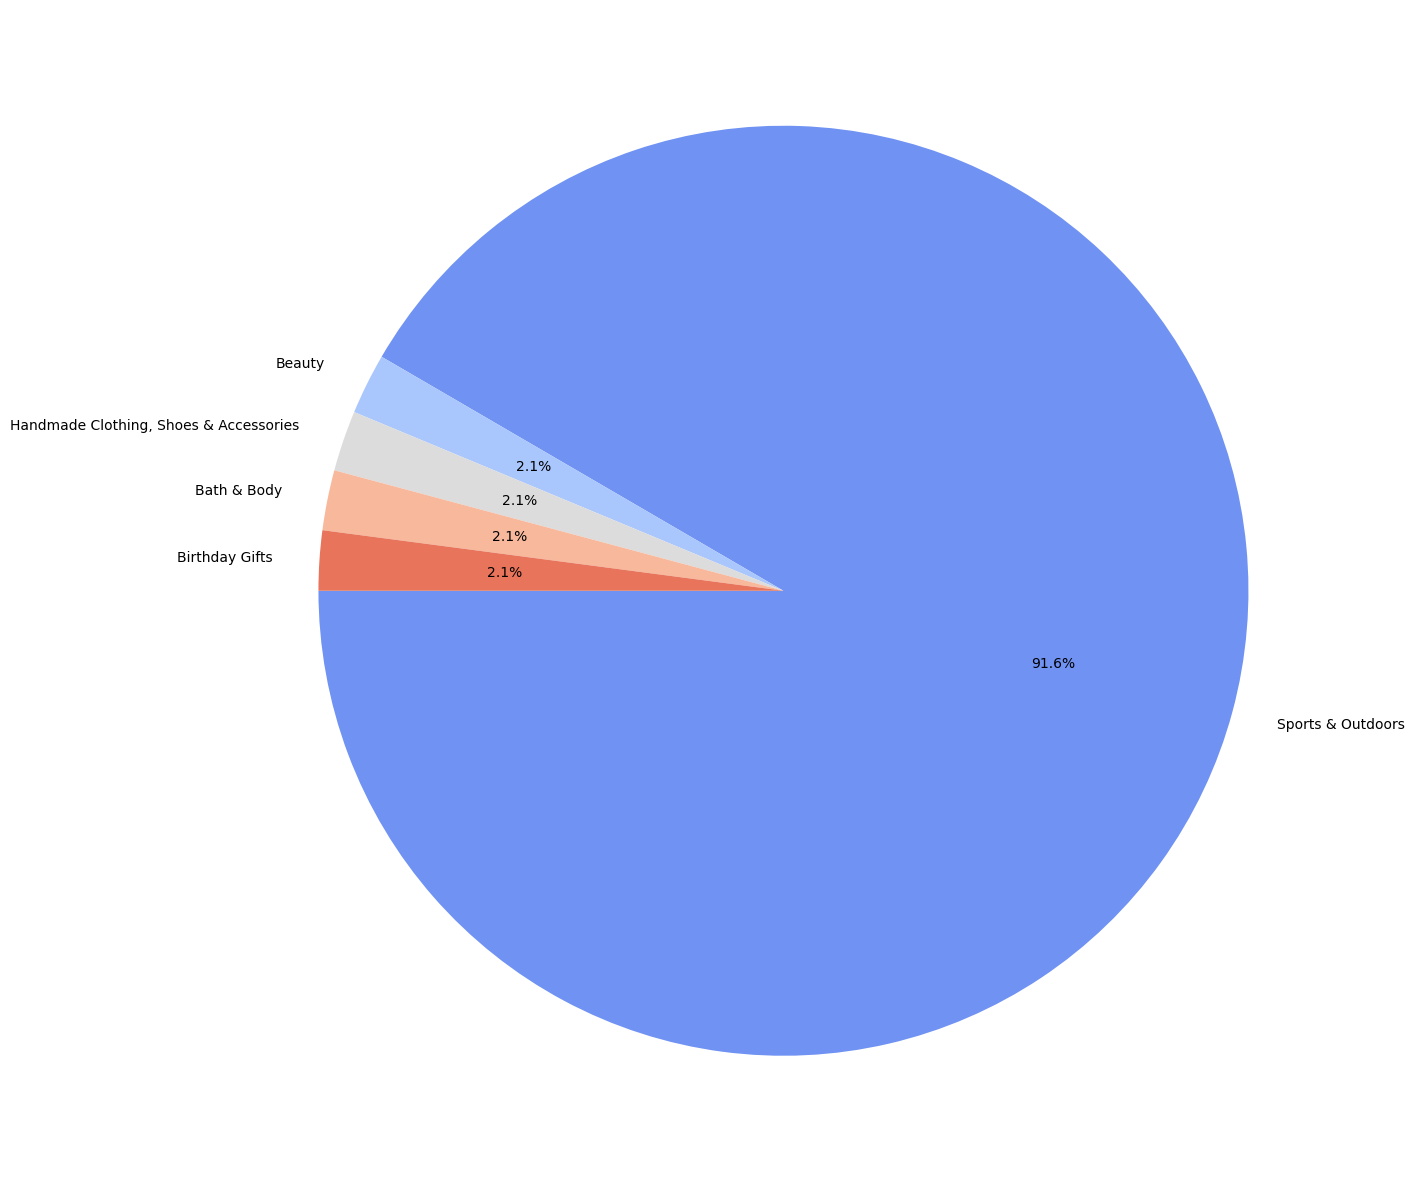

In [19]:
#In this pie chart, we're able to see the proportion better of top 5 categories, we can see that Beauty is a category that covers more than 90% of the chart.

labels = frequency_table["category"]
sizes = frequency_table["count"]

# Plot the pie chart
plt.figure(figsize=(15, 20))  
plt.pie(sizes, labels=labels, startangle=180, colors=sns.color_palette("coolwarm", len(sizes)), autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x1436c1e10>,
 [Text(-0.7727214722700572, -0.7828802758358365, 'Beauty'),
  Text(0.7903059274948224, -0.7651251799323747, 'Handmade Clothing, Shoes & Accessories'),
  Text(0.7646227186400176, 0.7907920701041132, 'Bath & Body'),
  Text(-0.7833712118855566, 0.7722237657498989, 'Birthday Gifts')],
 [Text(-0.4214844394200311, -0.4270256050013654, '25.2%'),
  Text(0.43107596045172125, -0.4173410072358407, '25.1%'),
  Text(0.41706693744000956, 0.43134112914769807, '24.9%'),
  Text(-0.4272933883012126, 0.42121296313630846, '24.8%')])

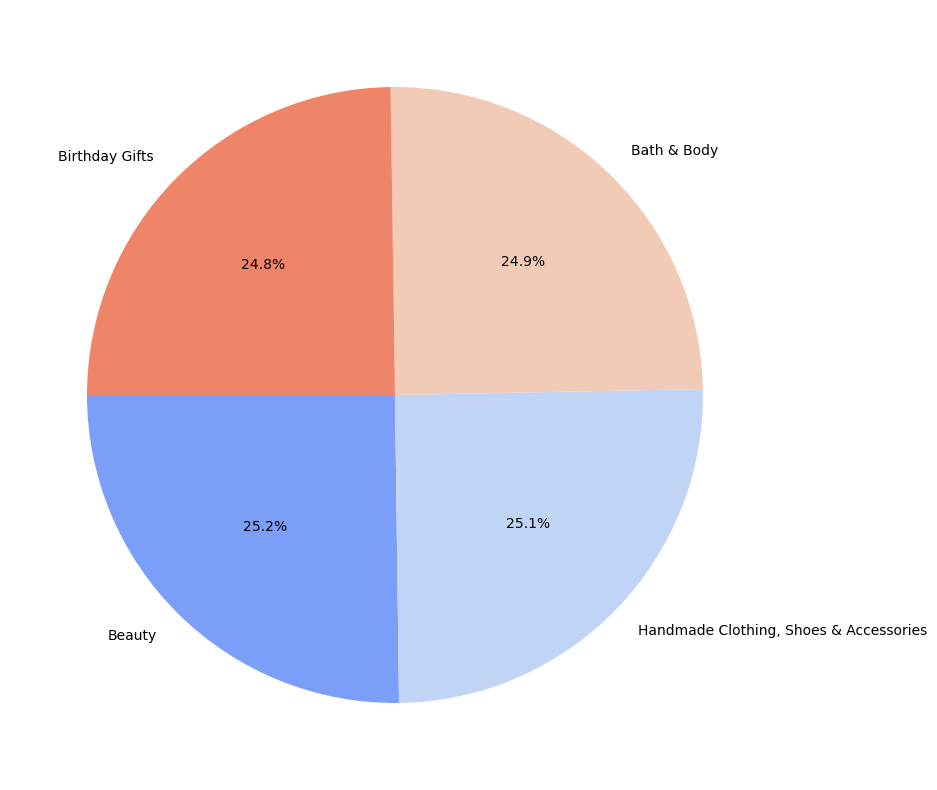

In [20]:
#We can see here the other 4 categories closer

labels = frequency_2["category"]
sizes = frequency_2["count"]

# Plot the pie chart
plt.figure(figsize=(10, 10))  
plt.pie(sizes, labels=labels, startangle=180, colors=sns.color_palette("coolwarm", len(sizes)), autopct='%1.1f%%')



Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?


Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?


Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.


In [22]:
df["price"].describe().round(2).reset_index()

,index,price
0,count,2443651.00
1,mean,89.24
2,std,345.61
3,min,0.00
4,25%,9.99
5,50%,19.09
6,75%,45.99
7,max,100000.00


In [23]:
df["price"].mode().reset_index()

,index,price
0,0,9.99


In [24]:
price_range = df["price"].max() #min is 0

In [25]:
var=round(df["price"].var())

In [26]:
iqr = df["price"].quantile([.25, .75]).reset_index()


In [27]:
q3 = df["price"].quantile(0.75)
q1 = df["price"].quantile(0.25)
iqr = q3 - q1

iqr

36.0

In [121]:
df["price"].value_counts().sort_values(ascending= False)

price
9.99       48922
12.99      38823
8.99       34058
7.99       33632
14.99      32570
           ...  
481.17         1
560.60         1
1552.17        1
349.08         1
317.34         1
Name: count, Length: 82916, dtype: int64

In [77]:
price_count= df["price"].value_counts()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


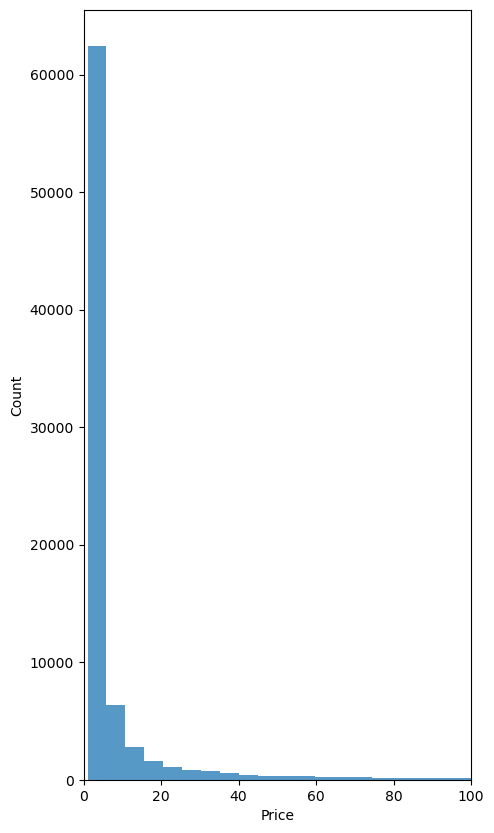

In [131]:

plt.figure(figsize=(5, 10))
sns.histplot(price_count, bins=10000)  # kde=True agrega una curva suavizada al histograma
plt.xlim(0, 100) 
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

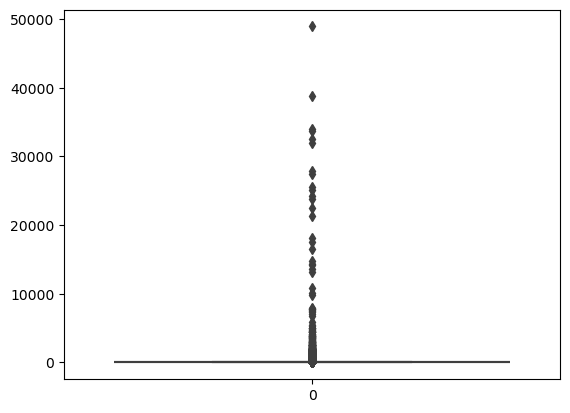

In [197]:
sns.boxplot(data= price_count)
plt.show()

Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?
Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?
Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?
Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [135]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [151]:
df["stars"].describe().round(2)

count    2443651.00
mean           2.15
std            2.19
min            0.00
25%            0.00
50%            0.00
75%            4.40
max            5.00
Name: stars, dtype: float64

In [187]:
df.groupby("category")["stars"].agg(mean_stars="mean").reset_index()

,category,mean_stars
0,3D Printers,2.643145
1,3D Printing & Scanning,0.148267
2,Abrasive & Finishing Products,4.125200
3,Action Cameras,1.281615
4,Adapters,4.142520
...,...,...
291,Wind Instruments,2.026400
292,Window Treatments,4.107950
293,Women,4.169446
294,Women's Sports & Outdoor Shoes,3.937570


In [189]:
df["stars"].var()

4.81743402976196

In [191]:
q3 = df["stars"].quantile(0.75)
q1 = df["stars"].quantile(0.25)
iqr = q3 - q1

In [193]:
iqr

4.4

In [205]:
df.stars.skew()

0.08120735761080985

In [207]:
df["stars"].kurtosis().round(2)

-1.93

In [ ]:

plt.figure(figsize=(5, 10))
sns.histplot(price_count, bins=10000)  # kde=True agrega una curva suavizada al histograma
plt.xlim(0, 100) 
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()